# Business Problem
* Apply the simple linear regression model on salary data set.
* Decide Whether there is a significant relationship between the variable in the linear regression model of the salary data set at 5% l.o.s

In [66]:
#data analysis and calculation 
import pandas as pd 
import numpy as np

#data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

#model builiding & data partition
import statsmodels.api as sm 
from statsmodels.stats import diagnostic as dig 
from sklearn.model_selection import train_test_split

# Data Import 

In [67]:
new = pd.read_csv(r"C:\Users\DLL\Desktop\Data Science Data\Machine Learning\Linear Regression\Salary_Data.csv")
new.head()  # first five rows

,YearsExperience,Salary
0,1.1,39.343
1,1.3,46.205
2,1.5,37.731
3,2.0,43.525
4,2.2,39.891


In [68]:
new.tail() # last five rows

,YearsExperience,Salary
25,9.0,105.582
26,9.5,116.969
27,9.6,112.635
28,10.3,122.391
29,10.5,121.872


# Data Type 

In [69]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Univariate Analysis

In [70]:
new.describe()

,YearsExperience,Salary
count,30.000000,30.00000
mean,5.313333,76.00300
std,2.837888,27.41443
min,1.100000,37.73100
25%,3.200000,56.72075
50%,4.700000,65.23700
75%,7.700000,100.54475
max,10.500000,122.39100


# Identify and Treatment of outlier 

<AxesSubplot:ylabel='YearsExperience'>

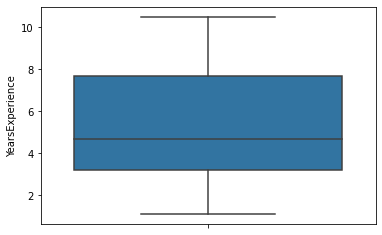

In [71]:
sns.boxplot(y='YearsExperience',data=new)

<AxesSubplot:ylabel='Salary'>

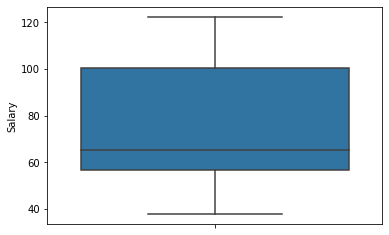

In [72]:
sns.boxplot(y='Salary',data=new)

# Identify Missing value

In [73]:
new.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Data Partition

In [74]:
new.head()

,YearsExperience,Salary
0,1.1,39.343
1,1.3,46.205
2,1.5,37.731
3,2.0,43.525
4,2.2,39.891


In [75]:
x=new[['YearsExperience']]
y=new[['Salary']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=200)

In [76]:
train=pd.concat([x_train,y_train],axis=1)
train.head()

,YearsExperience,Salary
8,3.2,64.445
5,2.9,56.642
27,9.6,112.635
17,5.3,83.088
28,10.3,122.391


# Correlation

##  1.Scatter plot 

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

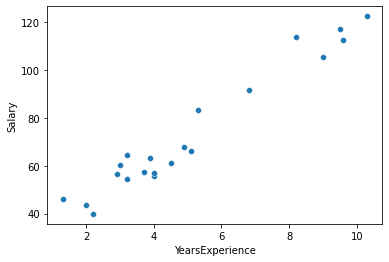

In [77]:
sns.scatterplot(x='YearsExperience',y='Salary',data=train)

## 2.Correlation Matrix 

In [78]:
train.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.974647
Salary,0.974647,1.000000


<AxesSubplot:>

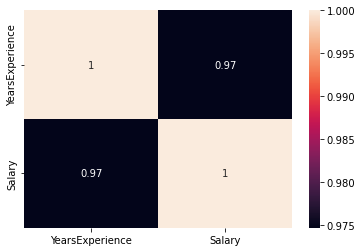

In [79]:
sns.heatmap(train.corr(),annot=True)

* 97% strong positive correlation between salary and years of experience.

# Model Builiding

## Hypothesis Testing 

* HO = There is no relationship between Salary and Years of Experience
                     vs
* H1 = There is relationship between Salary and Years of Experience
                Alpha = 5%(l.o.s)

In [80]:
import statsmodels.formula.api as smf
model = smf.ols('Salary ~ YearsExperience' , data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     360.5
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           8.17e-14
Time:                        19:39:57   Log-Likelihood:                -66.455
No. Observations:                  21   AIC:                             136.9
Df Residuals:                      19   BIC:                             139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          25.8464      2.825      9.150      0.000      19.934      31.759
YearsExperience     9.3525      0.493     18.987      0.000       8.322      10.383
==============================================================================
Omnibus:                        2.424   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                1.475
Skew:                           0.384   Prob(JB):                        0.478
Kurtosis:                       1.953   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion 
* we reject Ho
* There is relationship between Salary and Years of Experience.
* Accuracy of model is 95%, so model is good fit 
* y = 	25.8464 + 9.3525 * years of experience

## Manually

In [21]:
train.head()

,YearsExperience,Salary
8,3.2,64.445
5,2.9,56.642
27,9.6,112.635
17,5.3,83.088
28,10.3,122.391


In [ ]:
y=25.8464+9.3525*YearsExperience

In [24]:
y=25.8464+9.3525*9.6

In [25]:
y

115.6304

In [27]:
train['Fitted_value']=model.fittedvalues
train['Residual']=model.resid
train.head()

,YearsExperience,Salary,Fitted_value,Residual
8,3.2,64.445,55.774498,8.670502
5,2.9,56.642,52.968740,3.673260
27,9.6,112.635,115.630668,-2.995668
17,5.3,83.088,75.414804,7.673196
28,10.3,122.391,122.177436,0.213564


# Assumption of Model


## 1.Linearity 

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

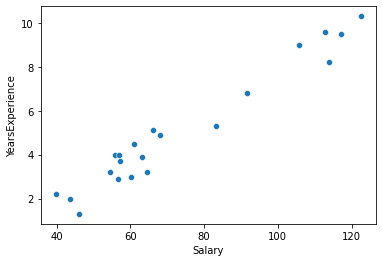

In [28]:
sns.scatterplot(x='Salary',y='YearsExperience',data=train)

## 2.Homoscedasticity (Constant variance)

<AxesSubplot:xlabel='Fitted_value', ylabel='Residual'>

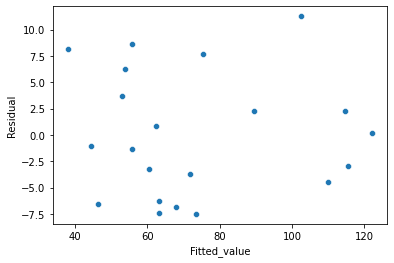

In [30]:
sns.scatterplot(x='Fitted_value',y='Residual',data=train)

## 3.Normality

C:\Users\DLL\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


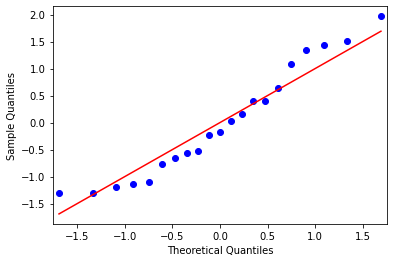

In [31]:
fig = sm.qqplot(train['Residual'],fit=True,line='s')

## 4.Model Error are IID

C:\Users\DLL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Residual', ylabel='Density'>

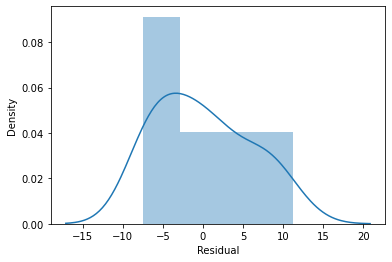

In [32]:
sns.distplot(train.Residual)

# Prediction on Test data 

In [55]:
test=pd.concat([x_test,y_test],axis=1)
test.head()

,YearsExperience,Salary
24,8.7,109.431
29,10.5,121.872
2,1.5,37.731
22,7.9,101.302
0,1.1,39.343


In [56]:
y=25.8464+9.3525*2.7

In [57]:
y

51.09815

In [42]:
test['Predicted']=model.predict(test)

In [43]:
test.head()

,YearsExperience,Salary,Predicted
24,8.7,109.431,107.213394
29,10.5,121.872,124.047942
2,1.5,37.731,39.875203
22,7.9,101.302,99.731373
0,1.1,39.343,36.134192


# R2 for test data 

In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(test.Salary,test.Predicted)
print("R2 score for accuracy of model on test data",np.round(r2,2))

R2 score for accuracy of model on test data 0.97


# R2 for train data

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Salary,train.Predicted)
print("R2 score for accuracy of model on train data",np.round(r2,2))

R2 score for accuracy of model on train data 0.97


### Model is Good Fit and Performance on test data is also good fit. 

## Prediction for live data -- live population 

In [52]:
A1 = {'Customer':pd.Series(['sayali','smita','omkar']),
     'YearsExperience':pd.Series([5.4,2.5,3])}
live = pd.DataFrame(A1)
live

,Customer,YearsExperience
0,sayali,5.4
1,smita,2.5
2,omkar,3.0


In [54]:
live['Prediction']=np.round(model.predict(live))
live

,Customer,YearsExperience,Prediction
0,sayali,5.4,76.0
1,smita,2.5,49.0
2,omkar,3.0,54.0
